This looks at the question of what happens if we make the tree finer (making time periods shorter)

For a European-option (non-early exercise), the price of the option at time0 when the time periods are infinitely short, is given by the Black-Scholes equation. Note that this is the solution to the heat equation!

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def callBS(underlyingPrice, strikePrice, timetoMaturity, sigma, r, q=0):
    d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity
    d1 /= sigma*np.sqrt(timetoMaturity)
    d2 = d1 - sigma*np.sqrt(timetoMaturity)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    return np.exp(-q*timetoMaturity)*underlyingPrice*N1 - np.exp(-r*timetoMaturity)*strikePrice*N2

def putBS(underlyingPrice, strikePrice, timetoMaturity, sigma, r, q=0):
    d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity
    d1 /= sigma*np.sqrt(timetoMaturity)
    d2 = d1 - sigma*np.sqrt(timetoMaturity)
    N1 = norm.cdf(-d1)
    N2 = norm.cdf(-d2)
    return np.exp(-r*timetoMaturity)*strikePrice*N2 - np.exp(-q*timetoMaturity)*underlyingPrice*N1 



#### Example parameters

In [2]:
underlyingPrice = 50
strikePrice = 50
timetoMaturity = 1
sigma = 0.4   # annual volatility
r = 0.04      # annual risk-free rate

#### Call and put values

In [3]:
C = callBS(
    underlyingPrice=underlyingPrice,
    strikePrice=strikePrice,
    timetoMaturity=timetoMaturity,
    sigma=sigma,
    r=r
)

P = putBS(
    underlyingPrice=underlyingPrice,
    strikePrice=strikePrice,
    timetoMaturity=timetoMaturity,
    sigma=sigma,
    r=r
)

print(f"call value is ${C:.2f}")
print(f"put value is ${P:.2f}")

call value is $8.79
put value is $6.83


#### Plots

C:\Users\bendo\AppData\Local\Temp\ipykernel_2920\3089416366.py:6: RuntimeWarning: divide by zero encountered in log
  d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity


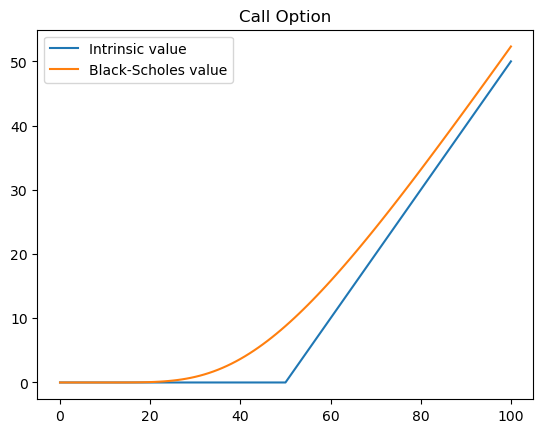

In [4]:
underlying = np.linspace(0,100,101)
intrinsic = np.maximum(underlying-strikePrice, 0)
bs = [callBS(x, strikePrice, timetoMaturity, sigma, r) for x in underlying]

plt.plot(underlying, intrinsic, label="Intrinsic value")
plt.plot(underlying, bs, label="Black-Scholes value")
plt.legend()
plt.title("Call Option")
plt.show()

Orange curve is what Black-Scholes says the limit of the option is worth. Blue curve is the intrinsic value.

The two curves never intersect to the right. This is due to the time-value of money. There is flexibility in being able to exercise an option early, so the intrinsic value is higher.

The two curves become very close to the left where the call is deep out of the money.

C:\Users\bendo\AppData\Local\Temp\ipykernel_2920\3089416366.py:14: RuntimeWarning: divide by zero encountered in log
  d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity


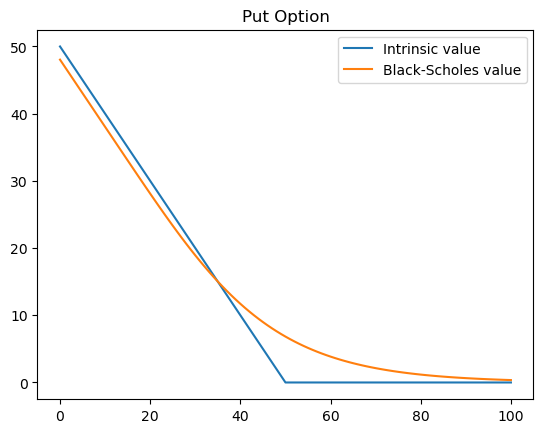

In [5]:
underlying = np.linspace(0,100,101)
intrinsic = np.maximum(strikePrice-underlying, 0)
bs = [putBS(x, strikePrice, timetoMaturity, sigma, r) for x in underlying]

plt.plot(underlying, intrinsic, label="Intrinsic value")
plt.plot(underlying, bs, label="Black-Scholes value")
plt.legend()
plt.title("Put Option")
plt.show()

If the put is European, you cannot exercise early, though you will wish you could. The value is the Black-Scholes value on the orange curve.

If the put is American, you can exercise early and should when value of the American Put intersects the Intrinsic value curve.